In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [152]:
benchmark = "exp5multi4"
perf_data = pd.read_csv("perfparsed-" + benchmark + ".csv", on_bad_lines="skip", dtype = {'time': int,'pid': int,'count': int,'event': str})
# perf_data = pd.read_csv("perfparsed-" + benchmark + ".csv")
io_data = pd.read_csv("ioparsed-" + benchmark + ".csv")
rapl_data = pd.read_csv("raplparsed-" + benchmark + ".csv")
pmtrace1 = pd.read_csv("tracefile-" + benchmark + ".csv")
# pmtrace2 = pd.read_csv("tracefile2.csv")

In [153]:

# perf_data.info()

# def is_number(n):
#     is_number = True
#     try:
#         num = float(n)
#         # check for "nan" floats
#         is_number = num == num   # or use `math.isnan(num)`
#     except ValueError:
#         is_number = False
#     return is_number

# for i in range(len(perf_data)):
#     perf_data.iloc[i]["count"] = int(perf_data.iloc[i]["count"])
#     if type(perf_data.iloc[i]["count"]) is "numpy.float64":
#         try:
#             perf_data.iloc[i]["count"] = int(perf_data.iloc[i]["count"])
#         except ValueError:
#             perf_data.iloc[i]["count"] = np.nan
type(perf_data.iloc[0]["count"])

numpy.int64

In [154]:
with open('tid-' + benchmark + '.txt') as f:
    lines = f.read().splitlines()

count = 0
count2 = 0
# pids1 = set()
# pids2 = set()
pids1 = {}
pids2 = {}
pids3 = {}
pids4 = {}

_size = 4

i = 0
for line in lines:   
    if line == '---':
        count += 1
#         pids1[int((count)/2)] = []
#         pids2[int((count-1)/2)] = []
        
        continue
    if count % _size == 1:
        # app1
        k = int(count / _size)
        if k in pids1:
            pids1[k].append(int(line))
        else:
            pids1[k] = []
            pids1[k].append(int(line))
    elif count % _size == 2:
        # app2
        k = int(count / _size)
        if k in pids2:
            pids2[k].append(int(line))
        else:
            pids2[k] = []
            pids2[k].append(int(line))
    elif count % _size == 3:
        # app3
        k = int(count / _size)
        if k in pids3:
            pids3[k].append(int(line))
        else:
            pids3[k] = []
            pids3[k].append(int(line))
    else:
        # app4
        k = int(count/_size)-1
        if k in pids4:
            pids4[k].append(int(line))
        else:
            pids4[k] = []
            pids4[k].append(int(line))
    


In [155]:
io_data.shape

(30282, 4)

In [156]:
# include dataset booleans
# include_pid1 = True
# include_pid2 = True
# include_pid3 = True
# include_pid4 = True


print("processing io_data")
io = {}
io1 = {}
io2 = {}
io3 = {}
io4 = {}
io_template = {'pid': p, 'blocks': 0, 'bytes': 0}
for i, r in io_data.iterrows():
    t = r['time'] + 1
    p = r['pid']
    written = False

    if t in pids1 and p in pids1[t]:
#         continue
        if t not in io1:
            io1[t] = {}
        if p not in io1[t]:
            io1[t][p] = io_template

        io1[t][p]['blocks'] += r['block']
        io1[t][p]['bytes'] += r['byte']
        # io1[t][p]['thread-count'] = 1
        written = True
    elif t in pids2 and p in pids2[t]:
#         continue
        if t not in io2:
            io2[t] = {}
        if p not in io2[t]:
            io2[t][p] = io_template
        io2[t][p]['blocks'] += r['block']
        io2[t][p]['bytes'] += r['byte']
        # io2[t][p]['thread-count'] = 1
        written = True
    elif t in pids3 and p in pids3[t]:
#         continue
        if t not in io3:
            io3[t] = {}
        if p not in io3[t]:
            io3[t][p] = io_template

        io3[t][p]['blocks'] += r['block']
        io3[t][p]['bytes'] += r['byte']
        # io3[t][p]['thread-count'] = 1
        written = True
    elif t in pids4 and p in pids4[t]:
#         continue
        if t not in io4:
            io4[t] = {}
        if p not in io4[t]:
            io4[t][p] = io_template

        io4[t][p]['blocks'] += r['block']
        io4[t][p]['bytes'] += r['byte']
        # io4[t][p]['thread-count'] = 1
        written = True
#     else:
#         if t not in io:
#             io[t] = {}
#         if p not in io[t]:
#             io[t][p] = {'pid': p, 'blocks': 0, 'bytes': 0}

#         io[t][p]['blocks'] += r['block']
#         io[t][p]['bytes'] += r['byte']
    
    # if written:
    if t not in io:
        io[t] = {}
    if p not in io[t]:
        io[t][p] = io_template

    io[t][p]['blocks'] += r['block']
    io[t][p]['bytes'] += r['byte']
    # io[t][p]['thread-count'] = 1
        

print("processing perf_data")
# perf_data
perf = {}
perf1 = {}
perf2 = {}
perf3 = {}
perf4 = {}
perf_template = {'pid': p, 'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0, 'thread-count': 0}
for i, r in perf_data.iterrows():
    t = r['time']
    p = r['pid']
    
    written = False

    if t in pids1 and p in pids1[t]:
#         continue
        if t not in perf1:
            perf1[t] = {}
        if p not in perf1[t]:
            perf1[t][p] = perf_template
        perf1[t][p][r['event']] += r['count']
        perf1[t][p]['thread-count'] = 1
        written = True
    elif t in pids2 and p in pids2[t]:
#         continue
        if t not in perf2:
            perf2[t] = {}
        if p not in perf2[t]:
            perf2[t][p] = perf_template
        perf2[t][p][r['event']] += r['count']
        perf2[t][p]['thread-count'] = 1
        written = True
    elif t in pids3 and p in pids3[t]:
#         continue
        if t not in perf3:
            perf3[t] = {}
        if p not in perf3[t]:
            perf3[t][p] = perf_template
        perf3[t][p][r['event']] += r['count']
        perf3[t][p]['thread-count'] = 1
        written = True
    elif t in pids4 and p in pids4[t]:
#         continue
        if t not in perf4:
            perf4[t] = {}
        if p not in perf4[t]:
            perf4[t][p] = perf_template
        perf4[t][p][r['event']] += r['count']
        perf4[t][p]['thread-count'] = 1
        written = True
#     else:
#         if t not in perf:
#             perf[t] = {}
#         if p not in perf[t]:
#             perf[t][p] = {'pid': p, 'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}
#         perf[t][p][r['event']] += r['count']
    
    # if written:
    if t not in perf:
        perf[t] = {}
    if p not in perf[t]:
        perf[t][p] = perf_template
    perf[t][p][r['event']] += r['count']
    perf[t][p]['thread-count'] = 1

print("merging")
# res = []



processing io_data
processing perf_data
merging


In [157]:
# l = max(list(perf.keys())[-1], list(io.keys())[-1])
# if (l > 3000):
#     l = max(list(perf.keys())[-1], sorted(list(io.keys()))[-2])
# print(l)

In [158]:
# # sorted(list(io.keys()))[-2]
# list(perf.keys())

In [159]:
def create_data(io, perf, data_name):

    l = max(list(perf.keys())[-1], list(io.keys())[-1])
    if (l > 3000):
        l = max(list(perf.keys())[-1], sorted(list(io.keys()))[-2])
    print(l)


    res = [{'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0, 'thread-count': 0}] * l

    for i in range(l):
        if i in perf:
            for p in perf[i]:
                res[i] = {x: res[i].get(x, 0) + perf[i][p].get(x, 0) for x in set(res[i]).union(perf[i][p])}
        if i in io:
            for p in io[i]:
                res[i] = {x: res[i].get(x, 0) + io[i][p].get(x, 0) for x in set(res[i]).union(io[i][p])}
        res[i].pop('pid', None)
    print("merging done")
    df = pd.DataFrame(res)
    pkg = rapl_data['pkg_pwr']
    ram = rapl_data['ram_pwr']
    df["pkg_pwr"] = pkg
    df["ram_pwr"] = ram
    df1 = pd.DataFrame()
    df1['power'] = pmtrace1['power']
    df = df.assign(power=df1['power'])
    df = df.dropna()
    # sorting columns
    df = df[sorted(df.columns)]
    # moving rapl values and power to the last 3 columns
    cols = list(df.columns.values) 
    cols.pop(cols.index('power'))
    cols.pop(cols.index('pkg_pwr')) 
    cols.pop(cols.index('ram_pwr'))
    df = df[cols+['pkg_pwr', 'ram_pwr', 'power']]
    df.to_csv("final-" + benchmark + f"{data_name}model1.csv") 

In [160]:
create_data(io1, perf1, 'app1')
create_data(io2, perf2, 'app2')
create_data(io3, perf3, 'app3')
create_data(io4, perf4, 'app4')
create_data(io, perf, '')

426
merging done
426
merging done
325
merging done
426
merging done
748
merging done


In [45]:
df.shape

(683, 13)

In [46]:
df.head()

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,thread-count,pkg_pwr,ram_pwr,power
0,36675534,446438876,12214814,68122746,0,0,64974408520,73292886150,67218107810,79,137.01,15.84,208.6
1,39464578,453507884,13605388,69906342,0,0,67969768616,74250783220,68427048926,79,137.95,15.95,208.7
2,50203932,583341086,15892938,87850796,0,0,89140893996,98187263382,90210756396,79,138.40,15.83,208.7
3,39541714,469935770,13035520,70273272,0,0,70853073456,77988917407,71893100561,135,138.49,15.87,208.8
4,48591538,573023028,16346922,86291972,0,0,84938895334,93955546342,85604200000,135,137.95,15.90,208.9


NameError: name 'df' is not defined

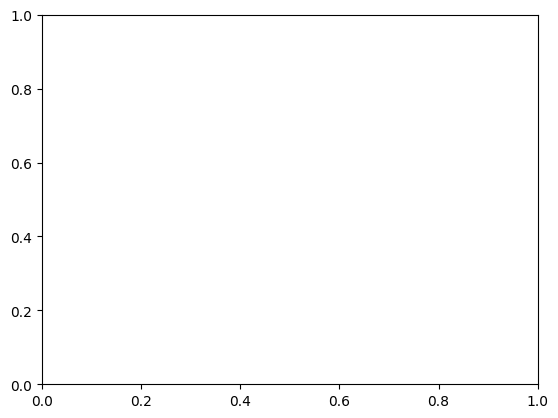

In [28]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

plt.plot(df1)
plt.legend(df1.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.ylim(ymin=0)
plt.show()

In [ ]:
df

In [ ]:
# processing io_data
io = {}
for i, r in io_data.iterrows():
    t = r['time'] + 1
    p = r['pid']
    if t not in io:
        io[t] = {}
    if p not in io[t]:
        io[t][p] = {'pid': p, 'blocks': 0, 'bytes': 0}
    io[t][p]['blocks'] += r['block']
    io[t][p]['bytes'] += r['byte']

In [ ]:
# processing perf_data
# perf_data
perf = {}
for i, r in perf_data.iterrows():
    t = r['time']
    p = r['pid']
    if t not in perf:
        perf[t] = {}
    if p not in perf[t]:
        perf[t][p] = {'pid': p, 'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}
    perf[t][p][r['event']] += r['count']

In [ ]:
list(perf.keys())[-1]

In [ ]:
list(io.keys())[-1]

In [ ]:
# res = []
l = max(list(perf.keys())[-1], list(io.keys())[-1])
res = [{'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}] * l
for i in range(l):
    if i in perf:
        for p in perf[i]:
            res[i] = {x: res[i].get(x, 0) + perf[i][p].get(x, 0) for x in set(res[i]).union(perf[i][p])}
    if i in io:
        for p in io[i]:
            res[i] = {x: res[i].get(x, 0) + io[i][p].get(x, 0) for x in set(res[i]).union(io[i][p])}
    res[i].pop('pid', None)

In [ ]:
df = pd.DataFrame(res)

In [ ]:
df = df.dropna()

In [ ]:
df

In [ ]:
# df.drop(df.tail(1).index,inplace=True)

In [ ]:
pkg = rapl_data['pkg_pwr']
ram = rapl_data['ram_pwr']
df["pkg_pwr"] = pkg
df["ram_pwr"] = ram

In [ ]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [ ]:
# df1 = pmtrace1
# df2 = pmtrace2
# df3 = pd.concat([df1['power'], df2['power']], axis=1)
# df3.columns = ['power1', 'power2']
# power = df1['power'] + df2['power']

df1 = pd.DataFrame()
df1['power'] = pmtrace1['power']

In [ ]:
df1

In [ ]:
plt.plot(df1)
plt.legend(df1.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.ylim(ymin=0)
plt.show()

In [ ]:
# power = list(power[4:len(df)+4])
# for i in range(len(power)):
#     power[i] = round(power[i], 1)

In [ ]:
df = df.assign(power=df1['power'])

In [ ]:
df = df.dropna()

In [ ]:
df

In [ ]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))
# df_log = df


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [ ]:
dfA = pd.read_csv("final-ycsbmongo_all1.csv")
dfA = dfA.loc[:, ~dfA.columns.str.contains('^Unnamed')]

In [ ]:
dfB = pd.read_csv("final-ycsbmongo_all2.csv")
dfB = dfB.loc[:, ~dfB.columns.str.contains('^Unnamed')]

In [ ]:
df = dfA.merge(dfB, how='outer')

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [ ]:
X

In [ ]:


# Import necessary modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model to the training data
model.fit(X, y)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Import necessary module
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print("Mean absolute error:", mae)

In [ ]:
df

In [ ]:
df['power'] = df['power'].shift(-3)

In [ ]:
df = df[:-3]

In [ ]:
df.to_csv("finaltest.csv")

In [ ]:
# Use the model to make predictions on the test data
y_pred = model.predict(X)

# Import necessary module
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y, y_pred)

# Print the mean absolute error
print("Mean absolute error:", mae)

df4 = pd.DataFrame({'Actual': y.flatten(), 'Pred': y_pred})

plt.figure(figsize=(10, 3))

plt.plot(df4)
plt.legend(df4.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
y.flatten()

In [ ]:
y

In [ ]:
y_test

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [ ]:
df5 = pd.DataFrame({'Power': df['power'], 'Pkg Pwr': df['pkg_pwr'], 'RAM Pwr': df['ram_pwr']})

plt.figure(figsize=(10, 3))

plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [ ]:
df.to_csv("final-" + benchmark + ".csv")

In [ ]:
df = pd.read_csv("datasets/final-mc.csv")

In [ ]:
df['LLC-load-misses'].max()

In [ ]:
df['LLC-store-misses'].max()

In [ ]:
df

In [32]:
dfmnn = pd.read_csv("datasets/final-diskexp.csv")

In [33]:
dfmnn = dfmnn.iloc[:400]

In [34]:
dfmnn.to_csv("datasets/final-diskexp.csv")

In [ ]:
dfmnn

In [ ]:
lr

In [ ]:
len(res)

In [ ]:
df

In [ ]:
df = pd.DataFrame(res)

In [ ]:
res

In [ ]:
l

In [ ]:
lr + l

In [ ]:
dfA

In [ ]:
dfB

In [71]:
df = pd.read_csv("datasets/final-all_mem.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [252]:
df

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,76951,474352,8459,65353,0,0,174916369,152899175,213074916,60.73,11.53,129.4
1,11325,646869,3155,55856,111928,57307136,190603831,186009713,205862590,58.42,10.83,112.9
2,20861,455452,3902,42446,0,0,193362627,182822532,211694058,58.40,10.89,112.8
3,43240,668760,7153,51160,0,0,238031935,234592197,259213875,58.66,11.08,112.7
4,10379,478334,1788,41089,9800,5017600,149914646,153151903,202807479,58.23,10.80,112.6
...,...,...,...,...,...,...,...,...,...,...,...,...
988,24604987,291364829,12395006,51426408,160,81920,34806529935,15376751978,35112726399,151.67,17.19,221.1
989,24395388,291924238,12586483,51556921,0,0,34948739056,15518131538,35190364496,136.69,16.24,159.8
990,29286882,352563403,14805391,62086176,616,315392,42155443213,18893514900,42487100791,78.80,13.62,121.2
991,7065642,87763963,2649341,15016617,0,0,10462213969,6085869503,10599848661,59.17,12.69,121.2


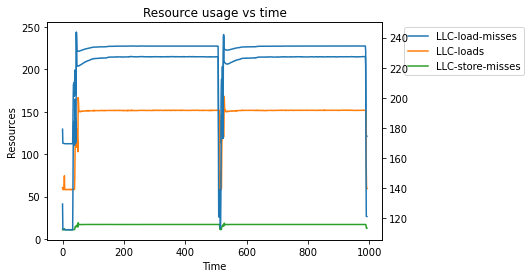

In [249]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
# df_log = df.apply(lambda x: np.log(x))
df_log = df


# Loop through each column in the dataframe
for column in ['power', 'pkg_pwr', 'ram_pwr']:
    # Plot the data in the column
#     if column not in ['power', 'pkg_pwr', 'ram_pwr']:
#         continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [250]:
df_log.index

RangeIndex(start=0, stop=993, step=1)

In [58]:
from cycler import cycler
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:4]
colors[3] = colors[0]
colors[0] = 'black'
default_cycler = (cycler(color=colors) + cycler(linestyle=['-', '--', ':', '-.']))

# plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

Average ratio of monitored power to RAPL power:  1.5031644614888209
Min:  0.62
Max:  3.46
90th percentile:  1.66
10th percentile:  1.32


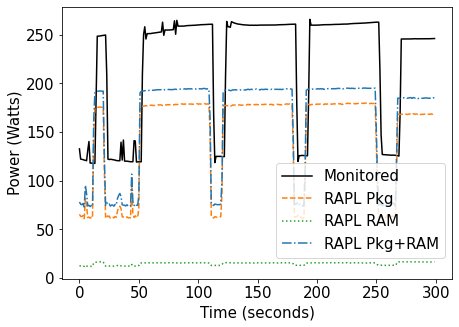

In [72]:
df6 = pd.DataFrame({'Monitored': df['power'], 'RAPL Pkg': df['pkg_pwr'], 'RAPL RAM': df['ram_pwr'], 'RAPL Pkg+RAM': df['pkg_pwr']+df['ram_pwr']})
df5 = df6[:300]
ratio = np.mean(df['power']/(df['pkg_pwr']+df['ram_pwr']))
print("Average ratio of monitored power to RAPL power: ", str(ratio))
print("Min: ", round(np.min(df['power']/(df['pkg_pwr']+df['ram_pwr'])), 2))
print("Max: ", round(np.max(df['power']/(df['pkg_pwr']+df['ram_pwr'])), 2))
arr = df['power']/(df['pkg_pwr']+df['ram_pwr'])
print("90th percentile: ", round(np.percentile(arr, 90), 2))
print("10th percentile: ", round(np.percentile(arr, 10), 2))
# for i in range(len(arr)):
#     if arr[i] < 1:
#         print(i, " ", df['power'][i], " ", df['pkg_pwr'][i] + df['ram_pwr'][i])
# fig, ax = plt.subplots()
plt.figure(figsize=(7, 5))
plt.rc('font', size=15)
plt.plot(df5, )
plt.legend(df5.columns, loc="lower right", bbox_to_anchor=(1, 0.05))
plt.ylabel("Power (Watts)")
plt.xlabel("Time (seconds)")
# plt.ylim(y)

image_format = 'pdf'
image_name = 'raplmem.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()



In [365]:
df_p1 = pd.read_csv('tracefile-cpu1.csv')
df_p2 = pd.read_csv('tracefile-cpu2.csv')
df_pA = pd.read_csv('tracefile-cpuA.csv')

In [366]:
df_p1['power'] -= 118
df_p2['power'] -= 118
df_pA['power'] -= 118

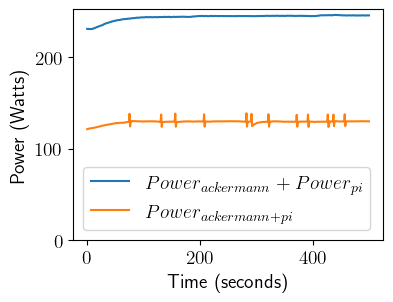

In [367]:
df5 = pd.DataFrame({'$Power_{ackermann} + Power_{pi}$': df_p1['power'][:500]+df_p2['power'][:500], '$Power_{ackermann + pi}$': df_pA['power'][:500]})

# fig, ax = plt.subplots()
plt.figure(figsize=(4, 3))
plt.rc('font', size=14)
plt.rc('text', usetex=True)
plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power (Watts)")
plt.xlabel("Time (seconds)")
plt.ylim(ymin=0)
# plt.ylim(y)

# image_format = 'eps'
# image_name = 'isolation_cpu.eps'
# plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

In [363]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [449]:
with open('memuse-' + str(42002) + '.txt') as f:
    lines = f.read().splitlines()

total = []
i = 0
for line in lines:
    line = int(line)
    if i % 2 == 0:
        total.append(line)
        total.append(line)
    else:
        total.append(line)
        total.append(line)
        total.append(line)  
    i += 1

In [446]:
dfM = pd.read_csv('final-exp18model1.csv')

In [450]:
dfM['rss'] += total[:len(dfM)]

In [451]:
dfM

,Unnamed: 0,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power,rss
0,0,984,2290,0,0,0,0,346178,78460,346196,132.16,15.85,192.2,54578
1,1,994,2262,0,0,0,0,361808,84102,361790,127.42,15.31,192.6,54578
2,2,5896,298580,8870,60780,0,0,7215774094,16077311604,7234911704,131.27,15.66,201.8,54578
3,3,19390,642358,29406,126940,0,0,9578234538,21101812368,9582863962,134.23,15.78,201.2,54578
4,4,15434,397164,12366,77752,0,0,6880842660,15228091588,6879627244,128.66,15.57,209.5,54578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,687,10450,40822,12032,16746,0,0,8130566190,22113500728,8131266394,178.36,16.83,264.7,1251117
688,688,806,1334,110,108,0,0,199484,63254,206186,179.46,16.78,264.8,1251117
689,689,13210,47748,15718,21342,0,0,10182120744,27202704396,10183458078,179.05,16.82,264.8,1251117
690,690,782,1232,632,1194,0,0,2972950,1554230,2980492,178.38,16.82,264.8,1251523


In [452]:
dfM = dfM.loc[:, ~dfM.columns.str.contains('^Unnamed')]
dfM = dfM[sorted(dfM.columns)]
# moving rapl values and power to the last 3 columns
cols = list(dfM.columns.values) 
cols.pop(cols.index('power'))
cols.pop(cols.index('pkg_pwr')) 
cols.pop(cols.index('ram_pwr'))
dfM = dfM[cols+['pkg_pwr', 'ram_pwr', 'power']]
dfM.to_csv("final-" + benchmark + "model1.csv")

In [453]:
dfM

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,rss,pkg_pwr,ram_pwr,power
0,984,2290,0,0,0,0,346178,78460,346196,54578,132.16,15.85,192.2
1,994,2262,0,0,0,0,361808,84102,361790,54578,127.42,15.31,192.6
2,5896,298580,8870,60780,0,0,7215774094,16077311604,7234911704,54578,131.27,15.66,201.8
3,19390,642358,29406,126940,0,0,9578234538,21101812368,9582863962,54578,134.23,15.78,201.2
4,15434,397164,12366,77752,0,0,6880842660,15228091588,6879627244,54578,128.66,15.57,209.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,10450,40822,12032,16746,0,0,8130566190,22113500728,8131266394,1251117,178.36,16.83,264.7
688,806,1334,110,108,0,0,199484,63254,206186,1251117,179.46,16.78,264.8
689,13210,47748,15718,21342,0,0,10182120744,27202704396,10183458078,1251117,179.05,16.82,264.8
690,782,1232,632,1194,0,0,2972950,1554230,2980492,1251523,178.38,16.82,264.8
